# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [4]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
from skimage.filters import gaussian
from skimage import feature
import skimage.io as io
from scipy import ndimage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

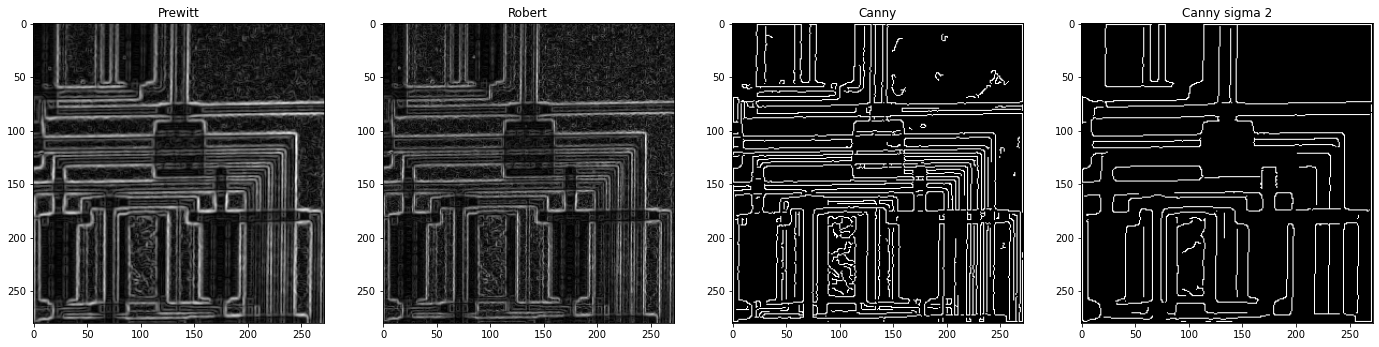

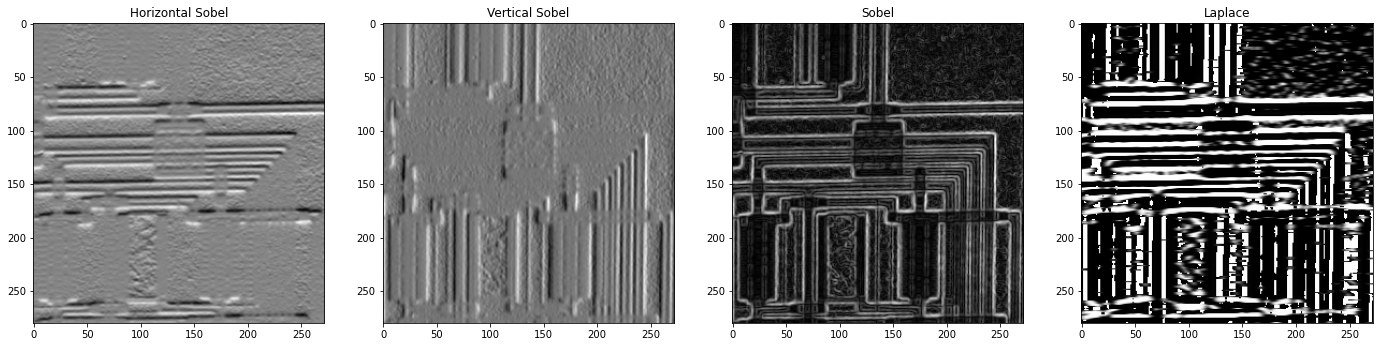

In [9]:
# 1. Built-in Sobel, Prewill, Roberts, Canny
# sobel & prewitt same out
img = io.imread('circuit.tif')
sobelImg_h = sobel_h(img)
sobelImg_v = sobel_v(img)
sobelImg = sobel(img) 
cannyImg = canny(img)
# 8 combination
prewittImg = prewitt(img)
# minus diagolans
robert = roberts(img)
#more details remove
cannyImg2 = canny(img,2)
#more details remove
laplacianGaussian = ndimage.gaussian_laplace(img,2)

show_images([prewittImg,robert,cannyImg,cannyImg2],['Prewitt','Robert','Canny','Canny sigma 2'])
show_images([sobelImg_h,sobelImg_v,sobelImg,laplacianGaussian],['Horizontal Sobel','Vertical Sobel','Sobel','Laplace'])

In [5]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

img =io.imread('./circuit.tif')



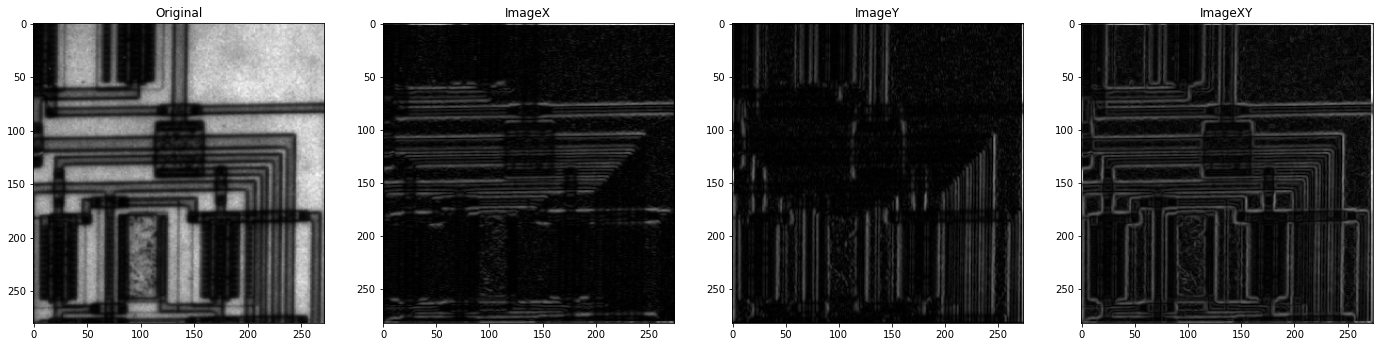

In [14]:
# 2. Custom Sobel (V-H-Both)

def sobelFilter(img):
    filterx= np.array([[-1, -2, -1], [0, 0, 0],[1, 2, 1]])
    filtery=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    imgx=np.abs(convolve2d(img,filterx))
    imgy=np.abs(convolve2d(img,filtery)) 
    newimgfiltered=np.sqrt((np.square(imgx)) + (np.square(imgy)))
    show_images([img,imgx,imgy,newimgfiltered],['Original','ImageX','ImageY','ImageXY'])
sobelFilter(img)    

image_1
image_2


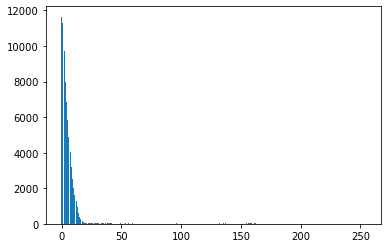

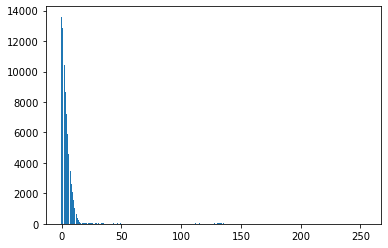

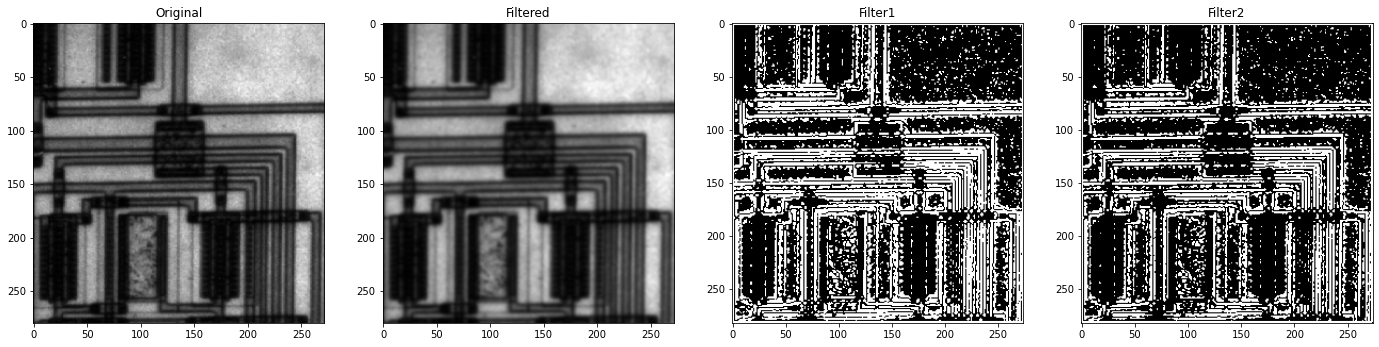

In [2]:
# 3. Custom LoG
thres_1= 5
thres_2= 5


circuit =io.imread('circuit.tif')
# print(np.shape(circuit))
# print(circuit)


# #1.Aplly Guassian Filter
circuit_filtered=gaussian(circuit,sigma=1)
# print(circuit_filtered)

#2.Filter 1
F1=np.ones(shape=(3,3),dtype=np.int8)*-1
F1[1,1]=8
# print("F1")
# print(F1)

#3.Filter 2
F2=np.ones(shape=(3,3),dtype=np.int8)
F2[:,:]=[0,1,0]
F2[1,:]=[1,-4,1]
# print("F2")
# print(F2)



#4.Apply Fiters
image_1=np.copy(circuit_filtered)
image_2=np.copy(circuit_filtered)

image_1 = np.abs(convolve2d(image_1,F1))
image_2 = np.abs(convolve2d(image_2,F2))

#5.Normalize
min_new=0;
max_new=255;

min_old_1=np.min(image_1)
max_old_1=np.max(image_1)

image_1=((image_1-min_old_1)*(max_new-min_new)/(max_old_1-min_old_1))+min_new;
print("image_1")
showHist(image_1)


min_old_2=np.min(image_2)
max_old_2=np.max(image_2)

image_2=((image_2-min_old_2)*(max_new-min_new)/(max_old_2-min_old_2))+min_new;
print("image_2")
showHist(image_2)


# # 5. Thresholding
image_1=np.where(image_1>thres_1,255,0).astype(int)
image_2=np.where(image_2>thres_2,255,0).astype(int)


# print("Image 1")
# print(image_1)
# showHist(image_1)


# print("Image 2")
# print(image_2)
# showHist(image_2)



show_images([circuit,circuit_filtered,image_1,image_2],['Original','Filtered','Filter1','Filter2'])     


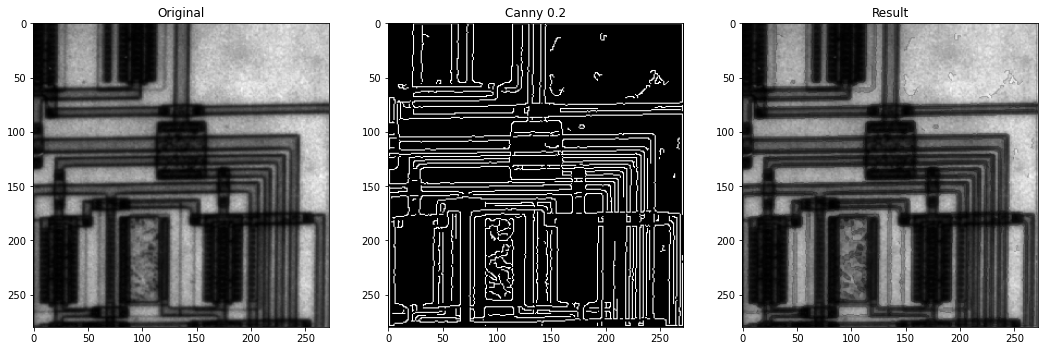

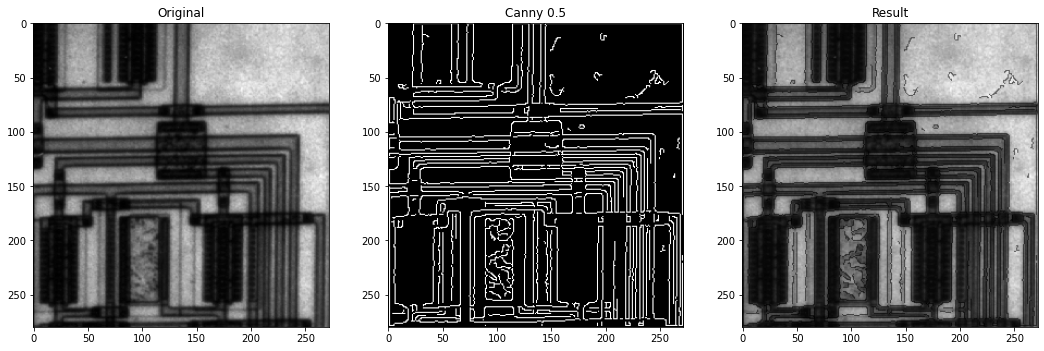

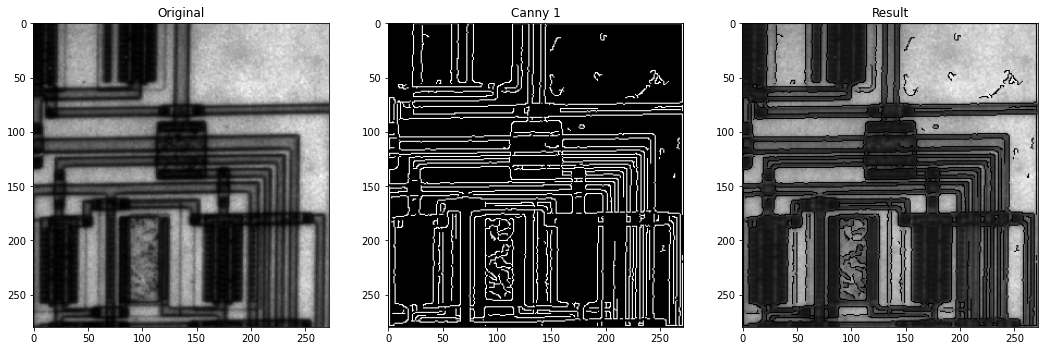

In [5]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''
# 1.Edge Detection
img = io.imread('circuit.tif')
edge_canny=feature.canny(img)

# 2.Multiply by 1/2
# edge_canny=edge_canny*(1)

# show_images([edge_canny],['1'])
# print(edge_canny)

edge_canny_1=edge_canny*(0.2)
# show_images([edge_canny],['1/2'])    
# print(edge_canny)


result=abs(img-edge_canny_1*img)
# result=np.where(result<0,0,result).astype(int)

show_images([img,edge_canny_1,result],['Original','Canny 0.2','Result'])     



edge_canny_2=edge_canny*(0.5)
# show_images([edge_canny],['1/2'])    
# print(edge_canny)


result=abs(img-edge_canny_2*img)
# result=np.where(result<0,0,result).astype(int)

show_images([img,edge_canny_2,result],['Original','Canny 0.5','Result'])     

edge_canny_3=edge_canny*(1)
# show_images([edge_canny],['1/2'])    
# print(edge_canny)


result=abs(img-edge_canny_3*img)
# result=np.where(result<0,0,result).astype(int)

show_images([img,edge_canny_3,result],['Original','Canny 1','Result'])     

# print(img[10,:])
# print(edge_canny[10,:])

# print(result[10,:])

# print(img)
# print(edge_canny)
# print(result)